### Задача 1
Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

    Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
    Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
    Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
    Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
    Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.


In [ ]:
import numpy as np

salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии.

$$b_1 = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2}, \: b_0 = \overline{y} - b_1 \cdot {\overline{x}}.$$

Здесь $x$, $y$ — данные из выборки, $\overline{x}$ обозначает выборочное среднее.

In [ ]:
x = salary
y = scoring

b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
b0 = np.mean(y) - b1 * np.mean(x)
print(b1, b0)

2.620538882402765 444.1773573243596


$$y = 444.17 + 2.62 \cdot x$$

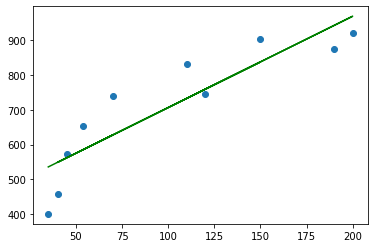

In [ ]:
from matplotlib import pyplot as plt

ox = salary
oy = b0 + b1 * ox

plt.scatter(salary, scoring)
plt.plot(ox, oy, color='green')

In [ ]:
#real scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
#pred:
pred = list()
for el in salary:
  pred.append(int(444.17 + 2.62*el))
print(pred)

predict = np.array(pred)

[535, 562, 941, 968, 548, 627, 585, 837, 758, 732]


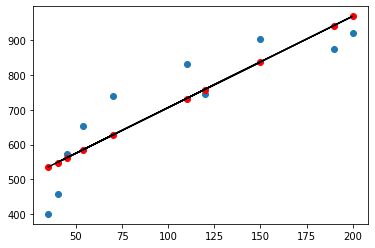

In [ ]:
plt.scatter(salary, scoring)
plt.scatter(salary, pred, color='red')
plt.plot(ox, oy, color='black')

In [ ]:
#посчитаем R
R = predict.var() / scoring.var()
R

0.7880959890563783

Коэффициент детерминации, равный $0.788$, означает, что $78 \%$ дисперсии переменной $y$ _учитывается_ или _объясняется_ моделью. Оставшиеся $22 \%$ обусловлены какими-то ещё факторами, которые модель не учла.

In [ ]:
#посчитает r2_score (детерминацию)
from sklearn.metrics import r2_score

r2 = r2_score(scoring, predict)
r2

0.7884793308847156

Коэф. близок к 80%, что говорит об успехе модели.


In [ ]:
#расчитаем ошибку апроксимации

def mean_approximation_error(y_real, y_pred):
    return np.abs((y_real - y_pred) / y_real).mean()

mean_approximation_error(scoring, predict)

0.11429792601569859

Ошибка составила более 10%, не очень.. =(

### Оценка значимости уравнения линейной регрессии

Оценить статистическую значимость уравнения линейной регрессии в целом можно с помощью __F-критерия Фишера__. Соответствующая статистика равна

$$T = \dfrac{R^2}{1 - R^2} \cdot \dfrac{n - k - 1}{k},$$

где $R^2$ - коэффициент детерминации, $n$ - число наблюдений, $k$ - число факторов. В литературе часто используются обозначения $k_1 = k$, $k_2 = n - k - 1$ (иногда вместо $k_1$, $k_2$ пишут также $f_1$, $f_2$).

По таблице (например, по [такой](https://www.chem-astu.ru/science/reference/F-statistic.html)) вычисляется критическое значение $F_{сrit} = F(k_1, k_2)$. Это же значение можно вычислить с помощью функции `scipy.stats.f.ppf`.

Если $T > F_{crit}$, то уравнение регрессии признаётся статистически значимым.

In [ ]:
k1 = 1
k2 = 8

T1 = (R / (1 - R)) * (k2 / k1)
T1

29.752942779966766

In [ ]:
from scipy import stats

alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

Имеем T>Fcrit, поэтому уравнение регрессии статистически значимо.

Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.

In [ ]:
def standard_error_slope(x, y, z):
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)


b0 = 447.17
b1 = 2.62

s_slope = standard_error_slope(salary, scoring, predict)
s_slope

0.48012962865914677

Зададим уровень значимости $\alpha = 0.05$. В нашем случае $n = 10$, поэтому нас интересует квантиль $t_{1 - 0.05/2, \: 8} = 2.8412$. Значение статистики $T$:

In [ ]:
T = b1 / s_slope
T

5.456859655416076

In [ ]:
t = 2.8412
(b1 - t * s_slope, b1 + t * s_slope)

(1.2558556990536323, 3.984144300946368)

b1 попадает, в область

In [ ]:
def standard_error_intercept(x, y, z):
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

s_intercept = standard_error_intercept(salary, scoring, predict)
s_intercept

56.35462075104849

Значение статистики $T$:

In [ ]:
T = b0 / s_intercept
T

7.934930517506505

In [ ]:
(b0 - t * s_intercept, b0 + t * s_intercept)

(287.055251522121, 607.284748477879)

Значение попало в критическую область, значит, значение параметра $b_0$ является значимым.

### Задача 2

В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица квантилей распределения Стьюдента?

Когда знаем дисперсию генеральной совокупности, тогда используем функцию лапласа, иначе – распределение стьюдента